<a href="https://colab.research.google.com/github/jks5177/BigAI/blob/main/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC_6_%ED%85%8D%EC%8A%A4%ED%8A%B8%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 설정


## 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp -r /content/gdrive/MyDrive/BigLeaderAI/자연어처리 /content/

In [ ]:
%cd /content/gdrive/MyDrive/BigLeaderAI/자연어처리/pytest/aclImdb_v1_small/aclImdb/

/content/gdrive/MyDrive/BigLeaderAI/자연어처리/pytest/aclImdb_v1_small/aclImdb


In [ ]:
!ls

test  train


# Train Data Loading

In [ ]:
import os

imdb_dir = '/content/gdrive/MyDrive/BigLeaderAI/자연어처리/pytest/aclImdb_v1_small/aclImdb/'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []

for label_type in ['neg', 'pos'] :
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name) :
    if fname[-4:] == '.txt' : # .txt파일 확인
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read()) # 텍스트에 저장
      f.close()
      if label_type == 'neg' :
        labels.append(0) # neg 폴더에 있는 값이면 0 추가
      else :
        labels.append(1) # pos 폴더에 있는 값이면 1 추가

# Data 확인

In [ ]:
print('texts 0:', texts[0])
print('texts len:', len(texts))

print('labels 0 :', labels[0])
print('labels len:', len(labels))

print('texts type:', type(texts))

texts 0: Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.
texts len: 60
labels 0 : 0
labels len: 60
texts type: <class 'list'>


# Data Tokenizing

* 텍스트에 사용된 단어의 종류를 빈도 순으로 정렬하는 작업을 수행한다.

In [ ]:
%tensorflow_version 2.x
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math

validation_ratio = math.floor(len(texts) * 0.3) # validation 생성
max_words = 10000 # 데이터셋에서 가장 빈도가 높은 9,999개의 단어만 사용한다. 남은 1개는 padding 0을 위해 남겨놓음
maxlen = 200 # 항상 각 문장의 길이가 200 단어가 되도록 고정

tokenizer = Tokenizer(num_words=max_words) # 상위빈도 max_words 개의 단어를 추려내는 Tokenizer 객체 생성
tokenizer.fit_on_texts(texts) # texts 내용에 대한 단어 인덱스를 구축한다. 사용할 단어가 결정된다.
word_index = tokenizer.word_index # 단어와 인덱스의 쌍을 가져온다.

validation 데이터가 test로 사용하지 못하는 이유 :

검증을 통해 모델이 조절되기 때문에 검증 데이터로 사용하지 못함

이미 모델은 검증 데이터에 최적화 되어있음

인덱싱의 첫 값이 1로 시작함 => 0번은 데이터 패딩에 이용함

# Tokenizing 결과 확인

In [ ]:
print('전체에서 %s개의 고유한 토큰을 찾았습니다.'%len(word_index))
print('word_index type: ', type(word_index))
print('word_index: ', word_index)

전체에서 2828개의 고유한 토큰을 찾았습니다.
word_index type:  <class 'dict'>
word_index:  {'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'br': 6, 'is': 7, 'in': 8, 'i': 9, 'this': 10, 'it': 11, 'that': 12, 'for': 13, 'film': 14, 'was': 15, 'are': 16, 'with': 17, 'but': 18, 'movie': 19, 'as': 20, 'you': 21, 'not': 22, 'at': 23, 'he': 24, 'on': 25, 'be': 26, 'one': 27, 'have': 28, 'an': 29, 'all': 30, 'his': 31, 'like': 32, 'good': 33, 'has': 34, 'or': 35, 'some': 36, 'just': 37, 'so': 38, 'even': 39, 'who': 40, 'by': 41, 'my': 42, 'story': 43, 'about': 44, 'from': 45, 'out': 46, 'time': 47, 'when': 48, "it's": 49, 'very': 50, 'they': 51, 'no': 52, 'if': 53, 'really': 54, 'acting': 55, 'there': 56, 'every': 57, 'him': 58, 'ever': 59, 'most': 60, 'more': 61, 'great': 62, 'people': 63, 'other': 64, 'how': 65, 'also': 66, 'her': 67, 'too': 68, 'would': 69, 'bad': 70, 'their': 71, 'your': 72, 'made': 73, 'what': 74, 'she': 75, 'stanley': 76, 'can': 77, 'had': 78, 'me': 79, 'make': 80, 'plot': 81, 'characters

* text_to_sequences()를 거쳐야 각 문장에서 빈도 순위 max_words(9,999)위까지만 남는다.
* word index는 Dictionary 타입이며, 토큰으로 선정된 각 단어에 대하여 index가 배당된 것을 알 수 있다.

# Tokenizer 연습

* Tokenizing을 할 때는 그 대상들이 별개의 원소로 있어야 한다.

In [ ]:
# 먼저 자료가 중첩 리스트로 있을 때의 경우이다.
sample1 = [['사과 감자 옥수수'], ['딸기 감자 옥수수'], ['양파 감자 옥수수'], ['양파 부추 옥수수']]
# 결과
# {'사과 감자 옥수수' :1, '딸기 감자 옥수수':2, '양파 감자 옥수수':3, '양파 부추 옥수수':4}

In [ ]:
sample2 = [['사과','감자','옥수수'], ['딸기','감자','옥수수'], ['양파','감자','옥수수'], ['양파','부추','옥수수']]
# 결과
# {'옥수수':1, '감자':2, '너희':4, '그들':5, '양파':6, '부추':7}

In [ ]:
# 단일 리스트일 경우에는 별개의 원소로 구분하지 ㅇ낳아도 된다.
sample3 = ['사과 감자 옥수수 너희 그들 양파 부추']
# 결과
# {'사과':1, '감자':2, '옥수수':3, '너희':4, '그들':5, '양파':6, '부추':7}

sample4 = ['사과', '감자','옥수수','너희','그들','양파','부추']
#결과
# {'사과':1, '감자':2, '옥수수':3, '너희':4, '그들':5, '양파':6, '부추':7}

# Data Sequencing

In [ ]:
# 각 문장에서 상위 빈도 9,999(max_words)개의 단어만 추출하여 word_index의 숫자를 가지는 리스트로 변환한다.

data = tokenizer.texts_to_sequences(texts) # 빈도 10,000의 Tokenizer결과가 여기서 반영된다.

print('data0:', data[0])

print('texts0 : ', texts[0])

data0: [43, 4, 3, 179, 40, 34, 1140, 308, 13, 3, 686, 494, 46, 17, 3, 1141, 142, 12, 7, 3, 687, 384, 4, 688, 495, 3, 1142, 689, 496, 7, 690, 90, 29, 691, 1143, 1144, 41, 1, 692, 1145, 4, 49, 1146, 309, 11, 693, 688, 1, 180, 47, 17, 52, 385, 1147, 1148, 254, 11, 37, 68, 181, 1149, 39, 216, 45, 1, 694, 106, 26, 690, 181, 1, 1150, 1151, 69, 80, 1152, 310, 695, 5, 3, 1153, 1154, 25, 3, 1155, 311, 49, 143, 144, 21, 255, 115, 17, 36, 33, 497, 41, 312, 62, 1156, 1157, 312, 386, 1158, 1159, 2, 1160, 1161, 77, 26, 123, 1162]
texts0 :  Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader.

* data
  * 각 단어들의 숫자 형태의 리스트로 변환되었다.
  * texts의 첫 번째 행의 단어들이 숫자로 변한 모습을 보여준다.
  * 상위 빈도 10,000에 속하는 것들이므로 숫자의 범위가 1~9999이다.
  * 빈도 9,999 내에 속하지 않는 단어들은 버린다.

* text
  * 본래 단어들

## 타입 확인

In [ ]:
print(type(texts))
print(type(data))

<class 'list'>
<class 'list'>


# Data Padding 연습

* Padding은 데이터의 길이를 고정시켜 준다.
* 지정된 길이에 모자라는 것은 0을 채우고, 넘치는 것은 잘라낸다.
* 넘치는 것을 잘라내는 이유는 문장이 길어질수록 많은 종류의 단어가 나오기 때문이다.
* 길이를 고정해야 텐서의 크기가 맞춰진다.
* 기본값으로 단어의 선택은 뒤에서부터 한다.
* 또한, nested list를 2D 텐서(2차원 넘파이 배열)로 만든다.

In [ ]:
from keras.preprocessing.sequence import pad_sequences

sequences = [[1, 2, 3, 4, 5], [1, 2, 3, 4], [1]] # nested list
padded = pad_sequences(sequences, maxlen=3)
print(padded)

[[3 4 5]
 [2 3 4]
 [0 0 1]]


# Data Padding

In [ ]:
data = pad_sequences(data, maxlen=maxlen)

print('data:', data)
print('data0 : ', data[0])
print(len(data[0]))

data: [[   0    0    0 ...   26  123 1162]
 [   0    0    0 ...  501   71  200]
 [   0    0    0 ...   18   22 1198]
 ...
 [   0    0    0 ... 2780   55 2781]
 [   0    0    0 ...  348 2799   85]
 [   0    0    0 ...   64  126   45]]
data0 :  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   43    4    3  179   40   34 1140  308   13    3
  686  494   46   17    3 1141  142   12    7    3  687  384    4  688
  495    3 1142  689  496    7  690   90   29  691 1143 1144   41    1
  692 1145    4   49 1146  309   11  693  688    1  180   47   17   52
  385 1147 1148  254   11   37   68  181 1149  

## 타입 확인

* Padding을 거치게 되면 Numpy 배열로 바뀌고, shape를 갖는다.

In [ ]:
print(type(texts))
print(type(data))
print(data.shape)

<class 'list'>
<class 'numpy.ndarray'>
(60, 200)


# One-Hot Encoding 연습

* one-hot encoding은 모든 숫자를 0과 1로만 만든다.
* 그렇지 않으면 index 값이 특성의 크기로 간주된다.

In [ ]:
sample = [[5, 6, 7], [8, 9, 10]]
arr = np.zeros((len(sample), 10+1))
for i, seq in enumerate(sample) :
  arr[i, seq] = 1.

arr

array([[0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

* '10'은 11번째에 들어가게 되므로 11개의 공간을 만든다. (패딩 0 고려)
* 리스트가 2개이므로 i는 총 2회 (0,1) 반복되며, 각 i에서 리스트의 number가 가리키는 곳에 1을 기록한다.

# One-Hoot Encoding

In [ ]:
def to_one_hot(sequences, dimension) :
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences) :
    results[i, sequences] = 1.
  return results

* data를 one-hot-encoding으로 0과 1의 벡터로 변환
* label은 이미 0과 1로 태깅되어 있으므로, list에서 넘파이 배열로만 변환. float32를 지정하지 않으며 int32로 저장된다.

In [ ]:
data = to_one_hot(data, dimension=max_words)
labels = np.asarray(labels).astype('float32')

## One-Hot Encoding 결과 확인

In [ ]:
print('data:', data)

print(len(data[0]))
print('data[0][0:100]:', data[0][0:100])

data: [[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]
10000
data[0][0:100]: [1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


* One-Hot Encoding을 거치게 되면 한 문장에 단어가 몇 번 나왔는지의 정보와 특정 단어가 어느 위치에 있는지의 정보는 사라진다.
* 0이 Padding의 결과인지는 더 이상 고려되지 않는다.
* 다만 숫자인덱스로 있었던 큰 숫자를 0과 1이라는 간닪나 숫자로 줄여 단어의 영향력을 없애준 것

## 타입 확인

In [ ]:
# One-Hot Encoding을 거치게 되면 타입은 그대로이나 shape가 바뀐다.
print(type(texts)) 
print(type(data)) 
print(data.shape) 

<class 'list'>
<class 'numpy.ndarray'>
(60, 10000)


# 입력부 노드

* 이상의 결과로 신경망의 입력부 노드는 위와 같이 원-핫-인코딩 결과로 시작된다.

* 입력층의 노드는 총 10,000개이며 위 예에서는 5개 종류의 어휘를 가지고 있으므로 이들 중 5개 노드만 1이 된다.

* 이들 각각은 은닉층의 노드에 각각의 가중치가 곱해져 전달된다. 나머지는 0이므로 값이 전달되지 않는다.

# Train 데이터와 Validation 데이터 준비

In [ ]:
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

indices = np.arange(data.shape[0])  # 0~24999까지의 숫자 생성
np.random.shuffle(indices)          # 0~24999까지의 숫자를 랜덤하게 섞음
data = data[indices]                # data를 indices로 섞음
labels = labels[indices]            # labels를 indices로 섞음

print(indices)

데이터 텐서의 크기: (60, 10000)
레이블 텐서의 크기: (60,)
[ 5 33 50 49 25 27 53 48 44 19  8  4 34 36  1 15 54  2 12 23 38 32 35 39
  9 41 28 55  7 21 43 20 10 11 51 46 52 37 22 31 47 26 56 17 58  6 18 13
 40  3 24 45 14 29 57  0 30 16 59 42]


# 훈련데이터와 검증 데이터 분리

In [ ]:
x_train = data[validation_ratio:] # 훈련데이터의 70%를 훈련데이터
y_train = labels[validation_ratio:] # 훈련데이터의 70%를 훈련데이터 Label(data와 labels는 같은 순서)

x_val = data[:validation_ratio] # 훈련데이터의 30%를 검증데이터
y_val = labels[:validation_ratio] # 훈련데이터의 30%를 검증데이터 Label

# 모델 정의하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 은닉 노드 수는 수렴하는 모습을 보이는 것이 좋다.

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 요약 출력

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


# Compile & Train Model

모델 컴파일
* 신경망의 출력이 확률이므로 오차값 계산은 crossentropy를 사용하는 것이 최선이다.
* 또한 이진 분류이므로 binary_crossentropy를 사용한다. 다중 분류에서는 categorical_crossentropy를 사용한다.
* 가중치 업데이트 방법은 RMSprop을 사용하였다.

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

모델 훈련
* 32개씩 미니 배치를 만들어 10번의 epoch로 훈련한다. 보통 8~512개 중에서 찾는다.
* 훈련 데이터로 훈련하고, 검증 데이터로 검증한다.
* 반환값의 history는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리이다.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
2/2 [==============================] - 1s 122ms/step - loss: 0.6836 - acc: 0.5714 - val_loss: 0.6747 - val_acc: 0.6111
Epoch 2/10
2/2 [==============================] - 0s 20ms/step - loss: 0.5239 - acc: 1.0000 - val_loss: 0.6625 - val_acc: 0.5556
Epoch 3/10
2/2 [==============================] - 0s 37ms/step - loss: 0.3558 - acc: 1.0000 - val_loss: 0.6341 - val_acc: 0.6111
Epoch 4/10
2/2 [==============================] - 0s 21ms/step - loss: 0.2399 - acc: 1.0000 - val_loss: 0.5883 - val_acc: 0.6667
Epoch 5/10
2/2 [==============================] - 0s 18ms/step - loss: 0.1591 - acc: 1.0000 - val_loss: 0.6245 - val_acc: 0.6111
Epoch 6/10
2/2 [==============================] - 0s 19ms/step - loss: 0.1112 - acc: 1.0000 - val_loss: 0.5462 - val_acc: 0.7778
Epoch 7/10
2/2 [==============================] - 0s 19ms/step - loss: 0.0720 - acc: 1.0000 - val_loss: 0.5627 - val_acc: 0.7778
Epoch 8/10
2/2 [==============================] - 0s 23ms/step - loss: 0.0528 - acc: 1.0000 - va

In [ ]:
!pwd

/content/자연어처리/pytest


In [ ]:
%cd /content/자연어처리/pytest/

/content/자연어처리/pytest


# Save Model

In [ ]:
# multidimensional numpy arrays를 저장할 수 있는 h5 file(HDF) 포맷으로 저장한다.
model.save('text_binary_model.h5')

In [ ]:
# 훈련데이터에서 사용된 상위빈도 10,000개의 단어로 된 Tokenizer 저장
# 새로 입력되는 문장에서도 같은 단어가 추출되게 한다.
import pickle
with open('text_binary_tokenizer.pickle', 'wb') as handle :
  pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Accuracy & Loss 확인

In [ ]:
# history 딕셔너리 안에 있는 정확도와 손실값을 가져와 본다.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Accuracy of each epoch:', acc)
epochs = range(1, len(acc) + 1)

Accuracy of each epoch: [0.5714285969734192, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


# Plotting Accuracy

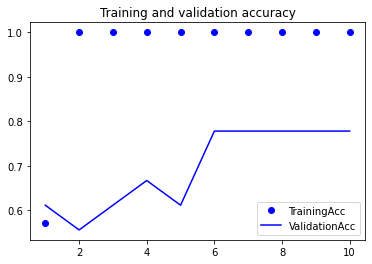

In [ ]:
import matplotlib.pyplot as plt

# 훈련데이터의 정확도에 비해 검증데이터의 정확도는 낮게 나타난다.
# epoch가 늘어나면 모델은 훈련데이터에 매우 민감해져(과대적합) 오히려 새로운 데이터를 잘 못 맞춘다.
plt.plot(epochs, acc, 'bo', label='TrainingAcc')
plt.plot(epochs, val_acc, 'b', label='ValidationAcc')
plt.title('Training and validation accuracy')
plt.legend()

# Plotting Loss

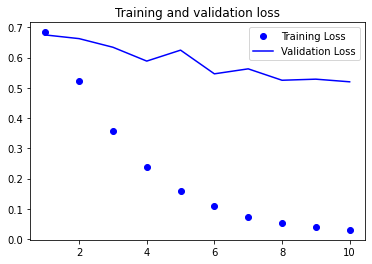

In [ ]:
plt.figure()

# 훈련데이터의 손실값은 낮아지나, 검증데이터의 손실값은 높아진다.
# 손실값은 오류값을 말한다. 예측과 정답의 차이를 거리 계산으로 구한 값이다.
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Load Model

In [ ]:
import os
from tensorflow.keras.models import load_model

filepath = '/content/자연어처리/pytest/'
os.chdir(filepath)
print('Current Directory:', os.getcwd())

loaded_model = load_model('text_binary_model.h5')
print('model loaded:', loaded_model)

with open('text_binary_tokenizer.pickle', 'rb') as handle :
  loaded_tokenizer = pickle.load(handle)

Current Directory: /content/자연어처리/pytest
model loaded: <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f9c1a45c310>


# Test Data Loading

In [ ]:
imdb_dir = '/content/자연어처리/pytest/aclImdb_v1_small/aclImdb'
test_dir = os.path.join(imdb_dir, 'test') # aclimdb 폴더의 테스트 데이터 내용을 가져온다.
labels = []
texts = []

for label_type in ['neg', 'pos'] :
  dir_name = os.path.join(test_dir, label_type)
  for fname in os.listdir(dir_name) :
    if fname[-4:] == '.txt' :
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg' :
        labels.append(0)
      else :
        labels.append(1)

# Data 확인

In [ ]:
print('texts:', texts[0])
print('texts len:', len(texts))

texts: Blake Edwards' legendary fiasco, begins to seem pointless after just 10 minutes. A combination of The Eagle Has Landed, Star!, Oh! What a Lovely War!, and Edwards' Pink Panther films, Darling Lili never engages the viewer; the aerial sequences, the musical numbers, the romance, the comedy, and the espionage are all ho hum. At what point is the viewer supposed to give a damn? This disaster wavers in tone, never decides what it wants to be, and apparently thinks it's a spoof, but it's pathetically and grindingly square. Old fashioned in the worst sense, audiences understandably stayed away in droves. It's awful. James Garner would have been a vast improvement over Hudson who is just cardboard, and he doesn't connect with Andrews and vice versa. And both Andrews and Hudson don't seem to have been let in on the joke and perform with a miscalculated earnestness. Blake Edwards' SOB isn't much more than OK, but it's the only good that ever came out of Darling Lili. The expensive and pr

# Data Sequencing

In [ ]:
# 문자열을 word_index의 숫자 리스트로 변환
data = loaded_tokenizer.texts_to_sequences(texts)

# padding으로 문자열의 길이를 고정시킨다.
data = pad_sequences(data, maxlen=maxlen)

# test 데이터를 원-핫 인코딩한다.
x_test = to_one_hot(data, dimension=max_words)

# label을 list에서 넘파이 배열로 변환. 결과가 0 또는 1만 나오므로 이와같이 int32로 저장해도 된다.
# 다중분류에서는 이 부분도 원-핫 인코딩 한다.
y_test = np.asarray(labels)

# Test Data Evaluation

In [ ]:
test_eval = loaded_model.evaluate(x_test, y_test)
print('prediction model loss & acc:', test_eval)

1/1 [==============================] - 0s 92ms/step - loss: 0.7184 - acc: 0.6500
prediction model loss & acc: [0.7184163331985474, 0.6499999761581421]


# 1개 데이터 예측

In [ ]:
text = ['Hi, this is a test sentence.'] # 데이터를 list 타입으로 만든다.

# tokenizer를 변경하지 않고 훈련에 사용했던 tokenizer를 사용할 것
data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen=maxlen)
x_test = to_one_hot(data, dimension=max_words)

prediction = loaded_model.predict(x_test)

# 다중 분류에서는 다음과 같이 넘파이 함수를 이용해 가장 큰 값을 찾는다.
# print("Result:", np.argmax(predictions[0]))
print("Result:", prediction)

Result: [[0.5758067]]
